## Лабораторная работа №4
### Выполнил: Овечкин В.А. М8О-408Б-18

# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества


In [ ]:
# 1. Задача регрессии, датасет https://www.kaggle.com/nickhould/craft-cans

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

In [ ]:
!ls

'healthcare-dataset-stroke-data (1).csv'   sample_data
 healthcare-dataset-stroke-data.csv


In [ ]:
isn = pd.read_csv("healthcare-dataset-stroke-data.csv")
isn.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(data.shape)
data.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Описание признаков


*   abv - крепость (вещественный признак)
*   ibu - горечь (вещественный признак)
*   id - уникальный id (вещественный признак)
*   name - название пива (строковый признак)
*   style - тип пива (строковый признак)
*   brewery_id = уникальный id (пивоварни вещественный признак)
*   ounces - объём пива (вещественный признак)



# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [ ]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [ ]:
data = data.replace(to_replace=['Male', 'Female'], value=[1, 0])

In [ ]:
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float128)

In [ ]:
data = clean_dataset(data)

ValueError: ignored

In [ ]:
data.head()

,abv,ibu,id,brewery_id,ounces
14,0.061,60.0,1979.0,177.0,12.0
21,0.099,92.0,1036.0,368.0,8.4
22,0.079,45.0,1024.0,368.0,12.0
24,0.044,42.0,876.0,368.0,12.0
25,0.049,17.0,802.0,368.0,12.0


Данные не содержат пропусков

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
design_matrix, target = data.drop(columns=['abv']).to_numpy(dtype=np.float128), np.array(data['abv'], dtype=np.float128)

KeyError: ignored

Разделим выходные данные на два класса:

Первый класс - abv крепость пива более 0.056.

Второй класс - abv крепость пива не более 0.056.

In [ ]:
print(data[data['abv'] > 0.056].shape[0] / data['abv'].shape[0] * 100)
print(data[data['abv'] <= 0.056].shape[0] / data['abv'].shape[0] * 100)

for index in range(len(target)):
    if target[index] > 0.056:
        target[index] = 1
    else:
        target[index] = 0

50.39145907473309
49.6085409252669


Пронормируем входные признаки и разделим датасет на обучающую и тестовую выборки.



In [ ]:
cnt_signs = design_matrix.shape[1]
max_values = np.zeros(cnt_signs)
for i in range(cnt_signs):
    max_in_clmn = design_matrix[:, i].max()
    max_values[i] = max_in_clmn
    design_matrix[:, i] /= max_in_clmn

features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, test_size=0.2, random_state=24)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [ ]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Сильной корреляции между признаками нет.

In [ ]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


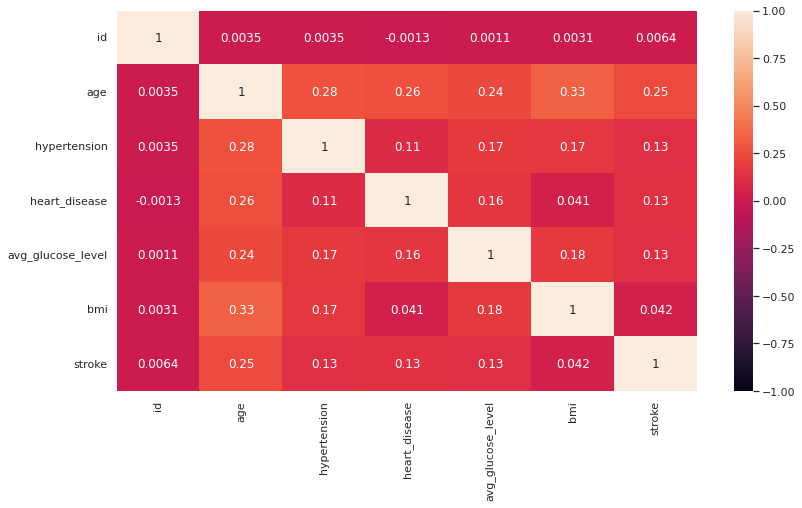

In [ ]:
#в необработанном датасете
sns.set(rc={'figure.figsize' : (13, 7)})
sns.heatmap(isn.corr(), annot=True, vmin=-1, vmax=1)

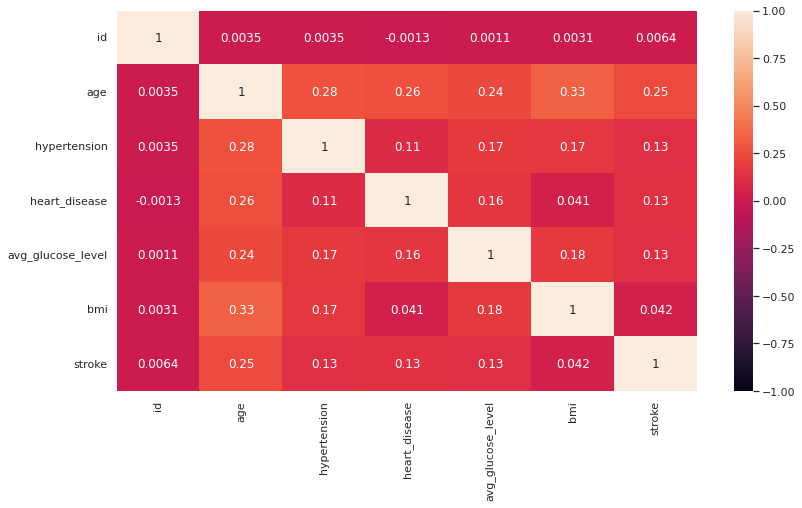

In [ ]:
sns.set(rc={'figure.figsize' : (13, 7)})
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f7518f90>,
      dtype=object)

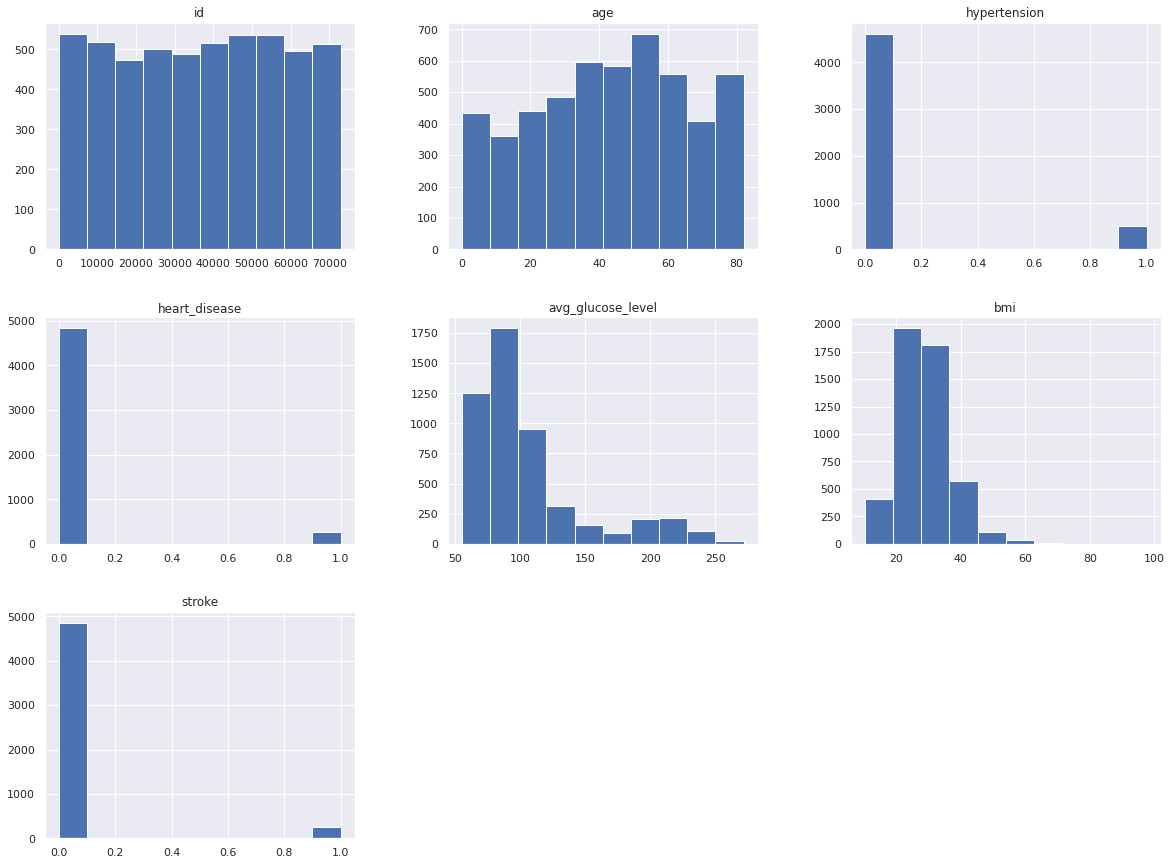

In [ ]:
data.hist(figsize=(20, 15))

In [ ]:
plt.figure()
pd.Series(target).value_counts().sort_index().plot(kind = 'pie')
plt.title('Соотношение фичей');

# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

In [ ]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

Поскольку для логистической регрессии метриками являются:


*   precision,
*   recall,
*   f1-score,

То выбирать нужно одну из них, реализуем f1-score.










In [ ]:
def f1_score(y,y_predicted):
    tp = np.logical_and(y_predicted,y).sum()
    fp = np.logical_and(y_predicted, np.logical_not(y)).sum()
    fn =np.logical_and(np.logical_not(y_predicted),y).sum()
    tn=np.logical_and(np.logical_not(y),np.logical_not(y_predicted)).sum()
    precision=float(tp)/(tp+fp)
    recall=float(tp)/(tp+fn)
    return (2*((precision*recall)/(precision+recall)))

# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [ ]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [ ]:
class MyLogisticRegression:
    
    def __init__(self, step=1e-1, n_iter=500):
        self.step = step
        self.n_iter = n_iter
        self.errors = []
        self.scores = []
        
        
    def logistic_function(self, z):
        return 1 / (1 + np.exp(-z))

    
    def fit(self, X, Y):
        X.shape
        x = np.hstack((np.ones((X.shape[0], 1)), X))
        self._weights = np.zeros(x.shape[1])
        for i in range(self.n_iter):
            z = np.dot(x, self._weights)
            gradient = np.dot(x.T, self.logistic_function(z) - Y) / Y.size
            self._weights -= self.step * gradient
            self.errors.append(np.sum((self.predict(X)-Y)**2)/Y.shape[0] )
            self.scores.append(f1_score(Y, self.predict(X)))
    
    
    def predict(self, X):
        x = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.logistic_function(np.dot(x, self._weights)).round()


    def score(self, X, Y):
        return f1_score(Y, self.predict(X))

In [ ]:
mlgTrain = MyLogisticRegression()
mlgTrain.fit(features_train_scaled, target_train)
mlgTest = MyLogisticRegression()
mlgTest.fit(features_test_scaled, target_test)

# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [ ]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [ ]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [ ]:
print('Результат собственной реализации логистической регресси на обучающей выборке: {}%'.format(mlgTrain.score(features_train_scaled, target_train) * 100))
print('Результат собственной реализации логистической регрессии на тестовой выборке: {}%'.format(mlgTest.score(features_test_scaled, target_test) * 100))

Результат собственной реализации логистической регресси на обучающей выборке: 77.80925401322003%
Результат собственной реализации логистической регрессии на тестовой выборке: 76.81159420289856%


In [ ]:
print('Результат собственной реализации логистической регресси на обучающей выборке: {}%'.format(mlg2.score(features_train_scaled, target_train) * 100))
print('Результат собственной реализации логистической регрессии на тестовой выборке: {}%'.format(mlg2.score(features_test_scaled, target_test) * 100))

# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

In [ ]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

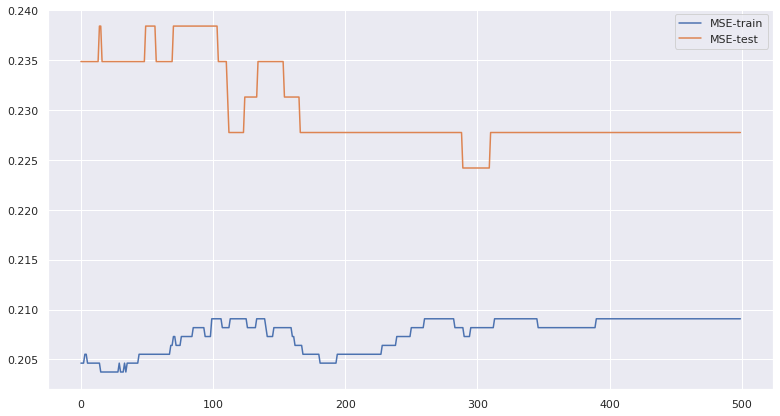

In [ ]:
plt.plot(mlgTrain.errors, label='MSE-train')
plt.plot(mlgTest.errors, label='MSE-test')
plt.legend()
plt.show()

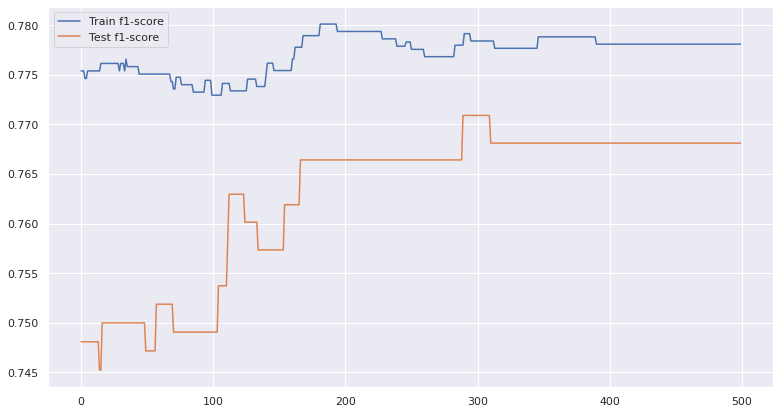

In [ ]:
plt.plot(mlgTrain.scores, label='Train f1-score')
plt.plot(mlgTest.scores, label='Test f1-score')
plt.legend()
plt.show()

# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [ ]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [ ]:
sklg = LogisticRegression(max_iter=10000)
sklg.fit(features_train, target_train)

LogisticRegression(max_iter=10000)

In [ ]:
print('Результат sklearn реализации логистической регрессии: {}%'.format(sklg.score(features_test, target_test) * 100))

Результат sklearn реализации логистической регрессии: 74.73309608540926%


In [ ]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

In [ ]:
def mse(actual,pred):
  return np.square(np.subtract(actual,pred)).mean()

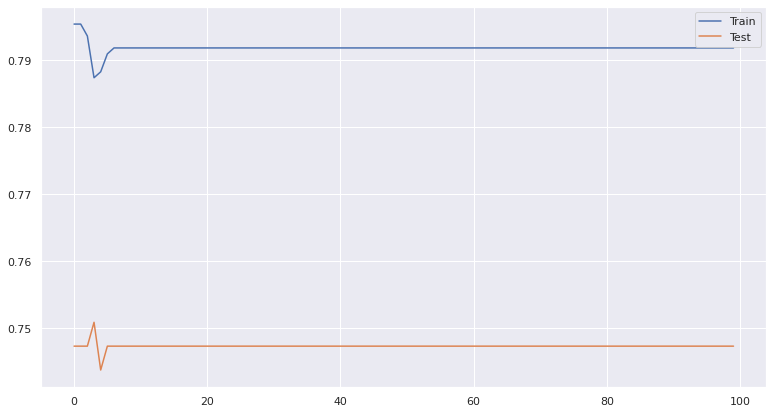

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sklearn_loss = []
sklearn_loss_test = []
for i in range(100):
    sklg = LogisticRegression(max_iter=i)
    sklg.fit(features_train_scaled, target_train)
    sklearn_loss.append(sklg.score(features_train_scaled, target_train))
    sklearn_loss_test.append(sklg.score(features_test_scaled, target_test))
plt.plot(sklearn_loss, label='Train')
plt.plot(sklearn_loss_test, label='Test')
plt.legend()
plt.show()